## Gathering

### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests 
import os
import json
from timeit import default_timer as timer
%matplotlib inline

### Importing the WeRateDogs Twitter archive as DataFrame

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

### Downloading and importing the tweet image predictions

In [3]:
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [4]:
with open('image_predictions.tsv', 'wb') as fd:
    for chunk in r.iter_content(chunk_size=128):
        fd.write(r.content)

In [5]:
predictions = pd.read_csv('image_predictions.tsv', sep='\t')

### Importing data from Twitter

len(fails_dict)

In [6]:
#We import the json text
tweets_json = []
with open('tweet_json.txt') as f:    
        for line in f:         
             tweets_json.append(json.loads(line))

In [7]:
#We import as Dataframe
df_tweetsjson = pd.DataFrame(tweets_json)
#we select select columns of interest
columns_of_interest = ['id', 'retweet_count', 'favorite_count']
df_tweetsjson = df_tweetsjson[columns_of_interest]

In [8]:
df_tweetsjson.head(1)

,id,retweet_count,favorite_count
0,892420643555336193,7923,37093


## Assessing the Datasets

### Visual assessment

In [9]:
twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


#### Quality:
- incomplete data for several columns (NaN:1,2,6,7,8 None:12,13,14,15,16)
- for the name, some are missing (None)

- for the name, incorrect information such as "a"

- the urls can not be used for data analysis
- the format for the date need to be corrected 

#### Tidiness

- The Table will be merged with the others

In [11]:
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.0614285,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.07419169999999999,True,Rhodesian_ridgeback,0.07201,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.13858399999999998,True,bloodhound,0.11619700000000001,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
5434962,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.22576999999999997,True,German_short-haired_pointer,0.175219,True
5434963,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.17027799999999998,False,Labrador_retriever,0.16808599999999999,True,spatula,0.0408359,False
5434964,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.0313789,True
5434965,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.0906465,True,papillon,0.0689569,True
5434966,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.09704860000000001,False,bagel,0.08585110000000001,False,banana,0.07611,False


#### Quality:
- No need for the column img_num 
- We have too many added rows 5434966 rows instead of 2355 for the first dataset
- Many information are not about dog and should be removed
It is better to have 0/1 and not true/false to make calculation
- Rename the label rows to be clearer p -> prediction
- Having only one row the most probablic prediction 

#### Tidiness

- The table will be merged with others

In [13]:
df_tweetsjson.head()

,id,retweet_count,favorite_count
0,892420643555336193,7923,37093
1,892177421306343426,5886,31913
2,891815181378084864,3887,24024
3,891689557279858688,8079,40413
4,891327558926688256,8757,38635


In [14]:
df_tweetsjson.tail()

,id,retweet_count,favorite_count
2328,666049248165822465,41,101
2329,666044226329800704,135,280
2330,666033412701032449,43,119
2331,666029285002620928,45,123
2332,666020888022790149,479,2476


#### Quality:
- Mising data: 2332 instead of 2355  of the first table
- Rename id as tweet_id

#### Tidiness


### programmatic assessment

In [15]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
twitter_archive.tweet_id.nunique()

2356

In [17]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [18]:
twitter_archive.duplicated().sum()

0

In [19]:
twitter_archive.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [20]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [21]:
sum(twitter_archive.rating_numerator <10)
   

440

In [22]:
pd.set_option('display.max_colwidth', -1)
twitter_archive.query('rating_numerator < 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111729840128/photo/1,6,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I was going to do 007/10, but the joke wasn't worth the &lt;10 rating",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https:/…,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313023332352/photo/1,7,10,Herschel,None,None,pupper,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https:/…,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409219559425/photo/1,9,10,Beau,None,None,None,None
599,798682547630837760,NaN,NaN,2016-11-16 00:22:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Here we see a rare pouched pupper. Ample storage space. Looks alert. Jumps at random. Kicked open that door. 8/10 https://t.…,6.769365e+17,4.196984e+09,2015-12-16 01:27:03 +0000,https://twitter.com/dog_rates/status/676936541936185344/photo/1,8,10,None,None,None,pupper,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1,10,None,None,None,None,None
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781661882474196992/photo/1,5,10,None,None,None,None,None


In [23]:
sum(twitter_archive.rating_numerator > 20)

24

In [24]:
pd.set_option('display.max_colwidth', -1)
twitter_archive.query('rating_numerator > 20')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None


In [25]:
print('Number of pupper is {}'.format((twitter_archive.pupper != "None").sum()))
print('Number of doggo is {}'.format((twitter_archive.doggo != "None").sum()))
print('Number of floofer is {}'.format((twitter_archive.floofer != "None").sum()))
print('Number of puppo is {}'.format((twitter_archive.puppo != "None").sum()))

Number of pupper is 257
Number of doggo is 97
Number of floofer is 10
Number of puppo is 30


In [26]:
twitter_archive.query('rating_denominator !=10').count()

tweet_id                      23
in_reply_to_status_id         5 
in_reply_to_user_id           5 
timestamp                     23
source                        23
text                          23
retweeted_status_id           1 
retweeted_status_user_id      1 
retweeted_status_timestamp    1 
expanded_urls                 19
rating_numerator              23
rating_denominator            23
name                          23
doggo                         23
floofer                       23
pupper                        23
puppo                         23
dtype: int64

#### Quality
* Some of the data are from retweet and not original
* Some numerators are decimals that cause errror in rating
* numerator and denominator should be float not int
* Drop value for which rating is less than ten or more than 20
* Drop all data for which the denominator is different from 10
* no need for the rows 1,2,6,7,8 for the data analysis: too many NaN values and we only want to work in original tweets
* no need for the rows 4,9: the urls are for no use in the data analysis
* timestamp should not be object but datetime

#### Tidiness
* for the last rows, we can merge to only one row

In [27]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434967 entries, 0 to 5434966
Data columns (total 12 columns):
tweet_id    object
jpg_url     object
img_num     object
p1          object
p1_conf     object
p1_dog      object
p2          object
p2_conf     object
p2_dog      object
p3          object
p3_conf     object
p3_dog      object
dtypes: object(12)
memory usage: 497.6+ MB


In [28]:
predictions.tweet_id.nunique()

2076

In [29]:
sum(predictions.tweet_id.duplicated())

5432891

In [30]:
(predictions.p1 == predictions.p2).value_counts()

False    5432349
True     2618   
dtype: int64

In [31]:
(predictions.p2 == predictions.p3).value_counts()

False    5434967
dtype: int64

In [32]:
(predictions.p1 == predictions.p3).value_counts()

False    5434967
dtype: int64

#### Quality
* there are only 2076 unique tweet_id, all other are dupplicated
* there are cases where the predictions p1 is the same as the predictions p2 (2618)
* tweet_id should be int not object
* all data are object
* tweet_id, p1conf, p2conf et p3conf should be int64

#### Tidiness

* The TAble will be merged with the others

In [33]:
df_tweetsjson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
id                2333 non-null int64
retweet_count     2333 non-null int64
favorite_count    2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [34]:
sum(df_tweetsjson.duplicated())

0

In [35]:
df_tweetsjson.id.nunique()

2333

#### Tidiness
* rename id as tweet_id
* Join the three tables and remove all the tweet not included in the last one


## Summary 

### Quality
#### 'twitter_archive' Table :
    1)Incomplete data for several columns (NaN:1,2,6,7,8 None:12,13,14,15,16)
    2) incorrect numerators data due to decimals
    3) rating_numerator int64 and not float
    4) fantasist or erroneous values for numerator (<10 and >20)
    5)Denominators who are not 10
    6)The name of the dogs is less useful
    7)the urls can not be used for data analysis 
    8)Some of data are reply to tweet and not original
    9)the format for date is not datetime
    
#### 'predictions' Table:
    10)no need for the column img_num,
    11)We have too many added rows 5434966 rows instead of 2355 for the first dataset, remove duplicted
    12)Many information are not about dog and should be removed, 
    13)tweet_id should be int not object 
    14)there are cases where the predictions p1 is the same as the predictions p2 (2618)
    15)It is better to have 0/1 and not true/false to make calculation, 
    16)rename the label rows to be clearer p -> prediction
    17) Only one row for the best prediction
    
#### 'df_tweetsjson' Table: 
    18)Mising data: 2332 instead of 2355 of the first table 
    19)rename id as tweet_id
    
### Tidiness
#### 'twitter_archive' Table:
    1) for the last rows, we can merge to only one row "stage"
    
#### all tables:
     
    2)join the three tables and remove all the tweets not included in the last one 
    

# Cleaning

In [36]:
twitter_archive_clean = twitter_archive.copy()
predictions_clean = predictions.copy()
df_tweetsjson_clean = df_tweetsjson.copy()


## 'Twitter_archive' table cleaning

##### Define
Delete the tweet that are not original: where in reply to status is not NaN and when retweeted_status is not NaN

##### Code

In [37]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isnull()]

In [38]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_timestamp.isnull()]

##### Test

In [39]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

#### Define
Drop the unneeded rows: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp 

##### Code

In [40]:
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1)

#### Test

In [41]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


#### Define 
Solve the incorrect values in rating numerators

In [42]:
ratings = twitter_archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

In [43]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 2 columns):
0    2097 non-null object
1    2097 non-null object
dtypes: object(2)
memory usage: 49.1+ KB


In [44]:
ratings = ratings.astype(float)

In [45]:
ratings.dtypes

0    float64
1    float64
dtype: object

In [46]:
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.astype(float)

In [47]:
twitter_archive_clean.rating_numerator.dtypes

dtype('float64')

In [48]:
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_denominator.astype(float)

In [49]:
twitter_archive_clean['rating_numerator'] = ratings[0]

In [50]:
twitter_archive_clean['rating_denominator'] = ratings[1]

#### Test

In [51]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null float64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 213.0+ KB


#### Define
Remove the data for which value is more than 20 for numerator or less than 10

#### Code

In [52]:
twitter_archive_clean = twitter_archive_clean.query('rating_numerator >= 10')
twitter_archive_clean = twitter_archive_clean.query('rating_numerator <20')
            

#### Test

In [53]:
sum(twitter_archive_clean.rating_numerator <10)

0

In [54]:
sum(twitter_archive_clean.rating_numerator >20)

0

#### Define
Remove the Name and the URLnot needed


#### Code

In [55]:
twitter_archive_clean = twitter_archive_clean.drop('name', axis=1)

In [56]:
twitter_archive_clean = twitter_archive_clean.drop('source', axis=1)

In [57]:
twitter_archive_clean = twitter_archive_clean.drop('expanded_urls', axis=1)

#### Test

In [58]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1663 entries, 0 to 2350
Data columns (total 9 columns):
tweet_id              1663 non-null int64
timestamp             1663 non-null object
text                  1663 non-null object
rating_numerator      1663 non-null float64
rating_denominator    1663 non-null float64
doggo                 1663 non-null object
floofer               1663 non-null object
pupper                1663 non-null object
puppo                 1663 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 129.9+ KB


#### Define
Remove the values foe which denominator is different from ten and drop the row

#### Code

In [59]:
twitter_archive_clean = twitter_archive_clean.query('rating_denominator == "10"')


#### Test

In [60]:
twitter_archive_clean.query('rating_denominator !="10"')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo


In [61]:
twitter_archive_clean = twitter_archive_clean.drop('rating_denominator', axis=1)

In [62]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1663 entries, 0 to 2350
Data columns (total 8 columns):
tweet_id            1663 non-null int64
timestamp           1663 non-null object
text                1663 non-null object
rating_numerator    1663 non-null float64
doggo               1663 non-null object
floofer             1663 non-null object
pupper              1663 non-null object
puppo               1663 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 116.9+ KB


##### Define
Change the format for timestamp from object to datetime (it is also a quality)

#### Code

In [63]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

#### Test

In [64]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1663 entries, 0 to 2350
Data columns (total 8 columns):
tweet_id            1663 non-null int64
timestamp           1663 non-null datetime64[ns]
text                1663 non-null object
rating_numerator    1663 non-null float64
doggo               1663 non-null object
floofer             1663 non-null object
pupper              1663 non-null object
puppo               1663 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 116.9+ KB


#### Define
Melt the last five rows into one 'stage'. I had to make change and not use melt with guidance of the tutor.

####  Code

In [65]:
twitter_archive_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1371
1,None,None,None,puppo,22
2,None,None,pupper,None,182
3,None,floofer,None,None,9
4,doggo,None,None,None,69
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,8
7,doggo,floofer,None,None,1


In [66]:
twitter_archive_clean.doggo.replace('None', '', inplace=True)

In [67]:
twitter_archive_clean.floofer.replace('None', '', inplace=True)

In [68]:
twitter_archive_clean.pupper.replace('None', '', inplace=True)

In [69]:
twitter_archive_clean.puppo.replace('None', '', inplace=True)

In [70]:
twitter_archive_clean['stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'


In [71]:
twitter_archive_clean = twitter_archive_clean.drop(['doggo','pupper', 'puppo', 'floofer'], axis=1 )

#### Test

In [72]:
twitter_archive_clean.stage.value_counts()

                  1371
pupper            182 
doggo             69  
puppo             22  
floofer           9   
doggo, pupper     8   
doggo, floofer    1   
doggo, puppo      1   
Name: stage, dtype: int64

In [73]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1663 entries, 0 to 2350
Data columns (total 5 columns):
tweet_id            1663 non-null int64
timestamp           1663 non-null datetime64[ns]
text                1663 non-null object
rating_numerator    1663 non-null float64
stage               1663 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 78.0+ KB


## Predictions table cleaning

#### Define
Removing the duplicated data

#### Code

In [74]:
predictions_clean = predictions_clean[~(predictions_clean.duplicated())]

#### Test

In [75]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2076 entries, 0 to 2075
Data columns (total 12 columns):
tweet_id    2076 non-null object
jpg_url     2076 non-null object
img_num     2076 non-null object
p1          2076 non-null object
p1_conf     2076 non-null object
p1_dog      2076 non-null object
p2          2076 non-null object
p2_conf     2076 non-null object
p2_dog      2076 non-null object
p3          2076 non-null object
p3_conf     2076 non-null object
p3_dog      2076 non-null object
dtypes: object(12)
memory usage: 210.8+ KB


#### Define
changing the type of data for tweet_id from object to int

#### Code

predictions_clean.tweet_id =  pd.to_numeric(predictions_clean.tweet_id, downcast='integer')

It did not work there is something wrong in position 2075

In [76]:
predictions_clean[2075:2076]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2075,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


We remove the ligne that is problematic

In [77]:
predictions_clean = predictions_clean.query('tweet_id != "tweet_id"')

In [78]:
predictions_clean[2075:2076]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


We try again

In [79]:
predictions_clean.tweet_id =  pd.to_numeric(predictions_clean.tweet_id, downcast='integer')

#### Test

In [80]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null object
p1_dog      2075 non-null object
p2          2075 non-null object
p2_conf     2075 non-null object
p2_dog      2075 non-null object
p3          2075 non-null object
p3_conf     2075 non-null object
p3_dog      2075 non-null object
dtypes: int64(1), object(11)
memory usage: 210.7+ KB


#### Define
Remove the img_num

#### Code

In [81]:
predictions_clean = predictions_clean.drop('img_num', axis=1)

#### Test

In [82]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null object
p1_dog      2075 non-null object
p2          2075 non-null object
p2_conf     2075 non-null object
p2_dog      2075 non-null object
p3          2075 non-null object
p3_conf     2075 non-null object
p3_dog      2075 non-null object
dtypes: int64(1), object(10)
memory usage: 194.5+ KB


#### Define
Remove the data not about dogs

In [83]:
predictions_clean = predictions_clean.query('p2_dog == "True" or p1_dog == "True" or p3_dog == "True"')

#### Test

In [84]:
(predictions_clean.query('p2_dog == "Falsa" and p1_dog == "False" and p3_dog == "False"'))

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [85]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 11 columns):
tweet_id    1751 non-null int64
jpg_url     1751 non-null object
p1          1751 non-null object
p1_conf     1751 non-null object
p1_dog      1751 non-null object
p2          1751 non-null object
p2_conf     1751 non-null object
p2_dog      1751 non-null object
p3          1751 non-null object
p3_conf     1751 non-null object
p3_dog      1751 non-null object
dtypes: int64(1), object(10)
memory usage: 164.2+ KB


#### Define
We one only one row for the prediction we remove p2 and p3 due to the result in favor of p1

In [86]:
(predictions_clean.p1_conf > predictions_clean.p2_conf).value_counts()

True     1738
False    13  
dtype: int64

In [87]:
(predictions_clean.p3_conf > predictions_clean.p1_conf).value_counts()

False    1728
True     23  
dtype: int64

In [88]:
predictions_clean = predictions_clean.drop(['p2_conf', 'p3_conf','p2','p3','p2_dog', 'p3_dog'], axis=1)


In [89]:
predictions_clean = predictions_clean.rename(columns={"p1": "prediction", "p1_conf": "confidence"})

In [90]:
predictions_clean = predictions_clean.drop('p1_dog', axis=1)

#### Test

In [91]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 4 columns):
tweet_id      1751 non-null int64
jpg_url       1751 non-null object
prediction    1751 non-null object
confidence    1751 non-null object
dtypes: int64(1), object(3)
memory usage: 68.4+ KB


## Json tweet Data from Api cleaning

#### Define
Rename id as tweet_id

In [92]:
df_tweetsjson_clean = df_tweetsjson_clean.rename(columns={'id':'tweet_id'})

In [93]:
df_tweetsjson_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
tweet_id          2333 non-null int64
retweet_count     2333 non-null int64
favorite_count    2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


## Join the three tables

In [94]:
twitter_archive_clean =pd.merge(twitter_archive_clean, predictions_clean,
                            on=['tweet_id'], how='left')

In [95]:
twitter_archive_clean = pd.merge(twitter_archive_clean, df_tweetsjson_clean,
                            on=['tweet_id'], how='left')

In [96]:
#After merging the three dataset we see if there is any null value
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1663 entries, 0 to 1662
Data columns (total 10 columns):
tweet_id            1663 non-null int64
timestamp           1663 non-null datetime64[ns]
text                1663 non-null object
rating_numerator    1663 non-null float64
stage               1663 non-null object
jpg_url             1376 non-null object
prediction          1376 non-null object
confidence          1376 non-null object
retweet_count       1656 non-null float64
favorite_count      1656 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 142.9+ KB


In [97]:
#We drop the NaN values
twitter_archive_clean = twitter_archive_clean.dropna()

In [98]:
#We check ifit applied
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1369 entries, 1 to 1662
Data columns (total 10 columns):
tweet_id            1369 non-null int64
timestamp           1369 non-null datetime64[ns]
text                1369 non-null object
rating_numerator    1369 non-null float64
stage               1369 non-null object
jpg_url             1369 non-null object
prediction          1369 non-null object
confidence          1369 non-null object
retweet_count       1369 non-null float64
favorite_count      1369 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 117.6+ KB


In [99]:
#We see if there is any duplicated
twitter_archive_clean.duplicated().sum()

0

In [100]:
#We store the Dataframe in the file
twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)

In [101]:
# We import the dataframe into df
df = pd.read_csv('twitter_archive_master.csv')

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1369 entries, 0 to 1368
Data columns (total 10 columns):
tweet_id            1369 non-null int64
timestamp           1369 non-null object
text                1369 non-null object
rating_numerator    1369 non-null float64
stage               228 non-null object
jpg_url             1369 non-null object
prediction          1369 non-null object
confidence          1369 non-null float64
retweet_count       1369 non-null float64
favorite_count      1369 non-null float64
dtypes: float64(4), int64(1), object(5)
memory usage: 107.0+ KB


In [103]:
# We see the number of grade rating
df.rating_numerator.value_counts()

12.00    419
10.00    357
11.00    352
13.00    217
14.00    21 
11.27    1  
11.26    1  
13.50    1  
Name: rating_numerator, dtype: int64

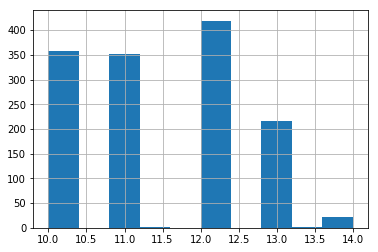

In [104]:
#We make an hist to see the ditribution
df['rating_numerator'].hist();

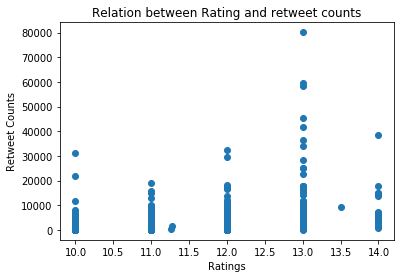

In [105]:
#We create a scatter plot to see the relation between ratings and retweets
x = df['rating_numerator']
y = df['retweet_count']

plt.scatter(x,y)
plt.title('Relation between Rating and retweet counts')
plt.xlabel('Ratings')
plt.ylabel('Retweet Counts')
plt.show()

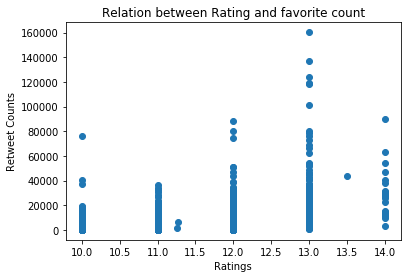

In [106]:
#We to the same for favorite
w = df['rating_numerator']
z = df['favorite_count']

plt.scatter(w,z)
plt.title('Relation between Rating and favorite count')
plt.xlabel('Ratings')
plt.ylabel('Retweet Counts')
plt.show()

In [107]:
df = df.sort_values(by=['rating_numerator','retweet_count','favorite_count'],ascending=False)

In [108]:
df_best_rate = df[:21]

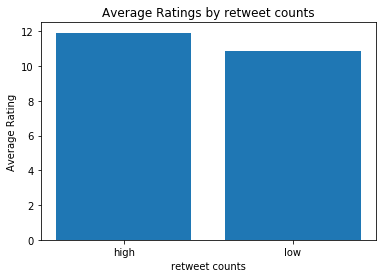

In [109]:
#We crete hist to see relation between the averge high retweet and the rating
median_retweet_count  = df["retweet_count"].median()
high_rate_retweet = df.query('retweet_count > {}'.format(median_retweet_count))
low_rate_retweet  = df.query('retweet_count < {}'.format(median_retweet_count))
average_low_rate_rt = low_rate_retweet["rating_numerator"].mean()
average_high_rate_rt = high_rate_retweet["rating_numerator"].mean()
locations = [1, 2]
heights = [average_high_rate_rt, average_low_rate_rt]
labels = ['high', 'low']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Ratings by retweet counts')
plt.xlabel('retweet counts')
plt.ylabel('Average Rating');


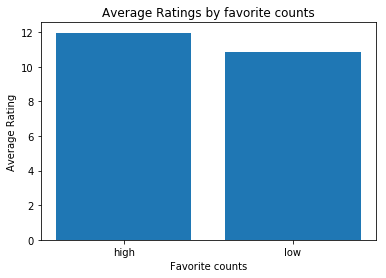

In [110]:
#We do the same for favorite
median_fav_count  = df["favorite_count"].median()
high_rate_fav = df.query('favorite_count > {}'.format(median_fav_count))
low_rate_fav  = df.query('favorite_count < {}'.format(median_fav_count))
average_low_rate_fav = low_rate_fav["rating_numerator"].mean()
average_high_rate_fav = high_rate_fav["rating_numerator"].mean()
locations = [1, 2]
heights = [average_high_rate_fav, average_low_rate_fav]
labels = ['high', 'low']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Ratings by favorite counts')
plt.xlabel('Favorite counts')
plt.ylabel('Average Rating');


In [111]:
df_best = df.sort_values(by= ['rating_numerator','retweet_count','favorite_count'], ascending=False)
df_best = df_best[:5]
df_best

,tweet_id,timestamp,text,rating_numerator,stage,jpg_url,prediction,confidence,retweet_count,favorite_count
289,819004803107983360,2017-01-11 02:15:36,This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,14.0,doggo,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,standard_poodle,0.351308,38488.0,90190.0
258,825535076884762624,2017-01-29 02:44:34,Here's a very loving and accepting puppo. Appears to have read her Constitution well. 14/10 would pat head approvingly https://t.co/6ao80wIpV1,14.0,puppo,https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg,Rottweiler,0.681495,17973.0,53934.0
273,822462944365645825,2017-01-20 15:17:01,"This is Gabe. He was the unequivocal embodiment of a dream meme, but also one h*ck of a pupper. You will be missed by so many. 14/10 RIP https://t.co/M3hZGadUuO",14.0,pupper,https://pbs.twimg.com/media/C2n5rUUXEAIXAtv.jpg,Pomeranian,0.960199,15067.0,29268.0
46,881536004380872706,2017-07-02 15:32:16,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,14.0,pupper,https://pbs.twimg.com/ext_tw_video_thumb/881535971568889856/pu/img/9bawiZ--8FKywTkz.jpg,Samoyed,0.281463,14968.0,47405.0
316,813812741911748608,2016-12-27 18:24:12,"Meet Gary, Carrie Fisher's dog. Idk what I can say about Gary that reflects the inspirational awesomeness that was Carrie Fisher. 14/10 RIP https://t.co/uBnQTNEeGg",14.0,NaN,https://pbs.twimg.com/media/C0s-XtzWgAAp1W-.jpg,French_bulldog,0.709146,14668.0,37923.0


In [112]:
print('Thank you for your patience!')

Thank you for your patience!


In [114]:
#the file image prediction was too heavy to make a submission I update with the cleaned one
predictions_clean.to_csv('image_predictions.tsv', sep='\t',index=False)